In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.precision", 1)
header = ["temperature", "dew_point", "pressure", "visibility", "wind_speed", "max_wind_speed", "max_temperature", "min_temperature"]
data = pd.read_csv("data_sets/weather_data.csv", names=header)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18159 entries, 0 to 18158
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      18159 non-null  float64
 1   dew_point        18159 non-null  float64
 2   pressure         18159 non-null  float64
 3   visibility       18159 non-null  float64
 4   wind_speed       18159 non-null  float64
 5   max_wind_speed   18159 non-null  float64
 6   max_temperature  18159 non-null  float64
 7   min_temperature  18159 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [4]:
data.describe()

,temperature,dew_point,pressure,visibility,wind_speed,max_wind_speed,max_temperature,min_temperature
count,18159.0,18159.0,18159.0,18159.0,18159.0,18159.0,18159.0,18159.0
mean,51.0,39.7,1016.8,11.7,7.0,14.0,62.0,42.5
std,21.1,20.1,47.7,3.9,3.7,5.3,22.2,20.4
min,-11.7,-25.7,980.2,0.1,0.1,1.9,-8.9,-22.0
25%,34.6,25.3,1011.4,9.3,4.4,10.1,44.1,28.0
50%,53.0,39.7,1015.9,11.4,6.4,13.0,64.9,43.0
75%,69.6,57.5,1020.8,14.5,9.0,17.1,81.0,60.1
max,92.5,77.6,5503.8,24.9,28.0,49.0,109.0,82.9


In [5]:
data.isnull().values.any()

False

In [6]:
def fahrenheit_to_celsius(f):
    return (f - 32) * 5 / 9

def miles_to_km(m):
    return m * 1.609344

def knots_to_kmh(k):
    return k * 1.852

# transform imperial units into metric units
data["temperature"] = data["temperature"].apply(fahrenheit_to_celsius)
data["dew_point"] = data["dew_point"].apply(fahrenheit_to_celsius)
data["visibility"] = data["visibility"].apply(miles_to_km)
data["wind_speed"] = data["wind_speed"].apply(knots_to_kmh)
data["max_wind_speed"] = data["max_wind_speed"].apply(knots_to_kmh)
data["max_temperature"] = data["max_temperature"].apply(fahrenheit_to_celsius)
data["min_temperature"] = data["min_temperature"].apply(fahrenheit_to_celsius)

data.describe()

,temperature,dew_point,pressure,visibility,wind_speed,max_wind_speed,max_temperature,min_temperature
count,18159.0,18159.0,18159.0,18159.0,18159.0,18159.0,18159.0,18159.0
mean,10.6,4.3,1016.8,18.8,13.0,26.0,16.7,5.8
std,11.7,11.2,47.7,6.3,6.8,9.9,12.3,11.4
min,-24.3,-32.1,980.2,0.2,0.2,3.5,-22.7,-30.0
25%,1.4,-3.7,1011.4,15.0,8.1,18.7,6.7,-2.2
50%,11.7,4.3,1015.9,18.3,11.9,24.1,18.3,6.1
75%,20.9,14.1,1020.8,23.3,16.7,31.7,27.2,15.6
max,33.6,25.3,5503.8,40.1,51.9,90.7,42.8,28.3


In [7]:
data[data.pressure > 1100]

,temperature,dew_point,pressure,visibility,wind_speed,max_wind_speed,max_temperature,min_temperature
3595,16.7,3.6,5503.8,15.9,17.6,44.6,18.3,15.6
3596,14.6,-0.6,5503.1,17.4,27.4,33.5,15.6,13.3


In [8]:
data = data[data.pressure <= 1100]
data.describe()

,temperature,dew_point,pressure,visibility,wind_speed,max_wind_speed,max_temperature,min_temperature
count,18157.0,18157.0,18157.0,18157.0,18157.0,18157.0,18157.0,18157.0
mean,10.6,4.3,1016.3,18.8,13.0,26.0,16.7,5.8
std,11.7,11.2,7.6,6.3,6.8,9.9,12.3,11.4
min,-24.3,-32.1,980.2,0.2,0.2,3.5,-22.7,-30.0
25%,1.4,-3.7,1011.4,15.0,8.1,18.7,6.7,-2.2
50%,11.7,4.3,1015.9,18.3,11.9,24.1,18.3,6.1
75%,20.9,14.2,1020.8,23.3,16.7,31.7,27.2,15.6
max,33.6,25.3,1047.8,40.1,51.9,90.7,42.8,28.3


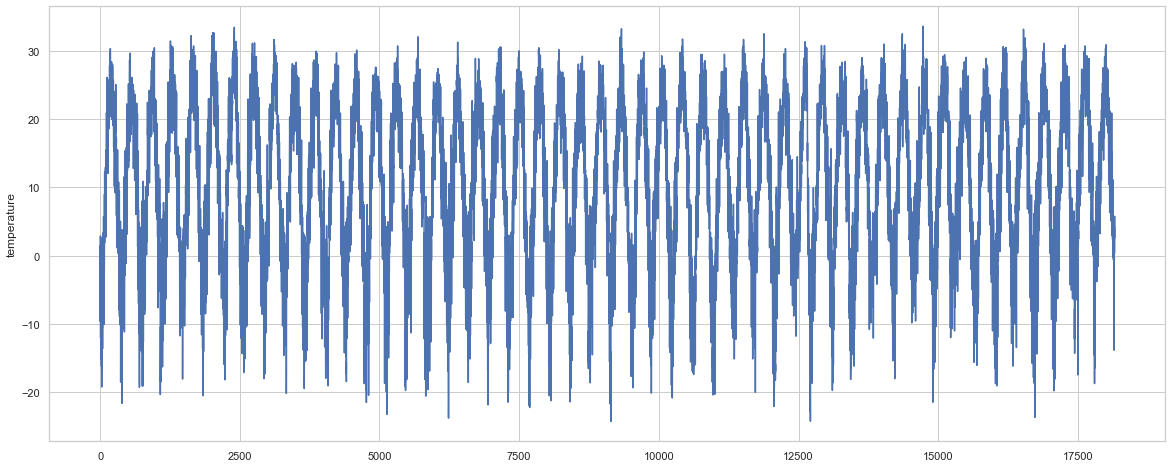

In [9]:
plt.figure(figsize=(20,8))
sns.set(style="whitegrid")

sns.lineplot(x=data.index, y="temperature", data=data)
plt.show()

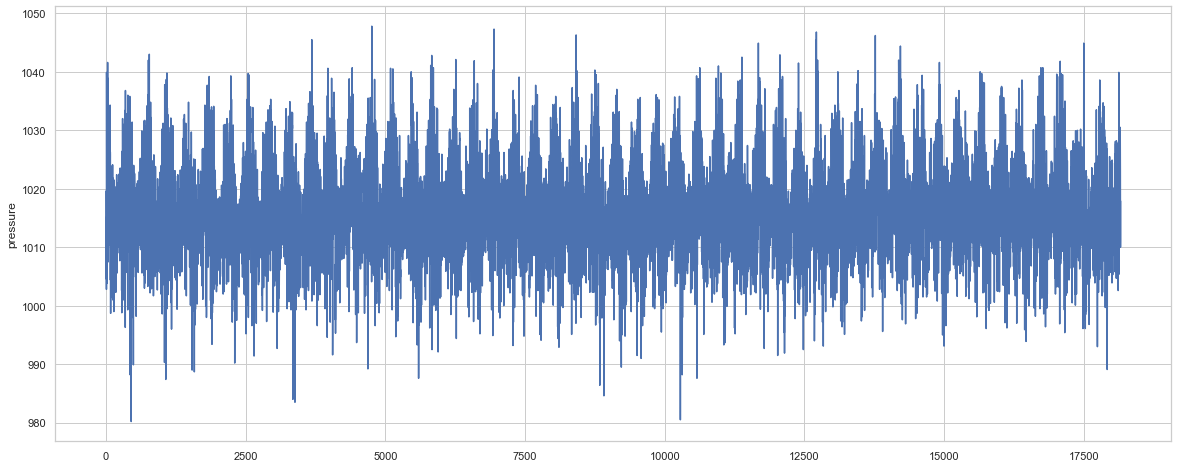

In [10]:
plt.figure(figsize=(20,8))
sns.set(style="whitegrid")

sns.lineplot(x=data.index, y="pressure", data=data)
plt.show()